# Mixture Manifold HMC with Persistent Zappa

This is not working because Zappa's algorithm leaves the distribution ON THE MANIFOLD invariant, not the true target distribution. Hence we are not targeting the correct distribution.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm
from ManifoldHMCAlgorithms.mixture_manifoldhmc import MixtureManifoldHMCPersistent
from ManifoldHMCAlgorithms.mixture_manifoldhmc import MixtureManifoldHMC
from utils import quick_MVN_marginals, quick_MVN_scatter

In [17]:
# Target Distribution 
Sigma = np.array([[1.0, 0.99], [0.99, 2.0]])        # Covariance Matrix of Target Distribution
mu = np.zeros(2)                                  # Mean of target distribution
target = multivariate_normal(mean=mu, cov=Sigma)

# Settings for sampling
n = 1            # Number of HMC samples per iteration
m = 100           # Number of Zappa samples per iteration
T = 2            # Total integration time
epsilon = 0.05    # Step size
M = np.eye(2)     # Coviariance Matrix for momentum distribution
alpha = 0.1       # Probability of using HMC
N = 200000         # Total number of samples
x0 = target.rvs()

In [24]:
persistent_samples = MixtureManifoldHMCPersistent(x0, alpha=alpha, N=N, n=n, m=m, 
                                       Sigma=Sigma, mu=mu, T=T, epsilon=epsilon, M=M, s=0.1)

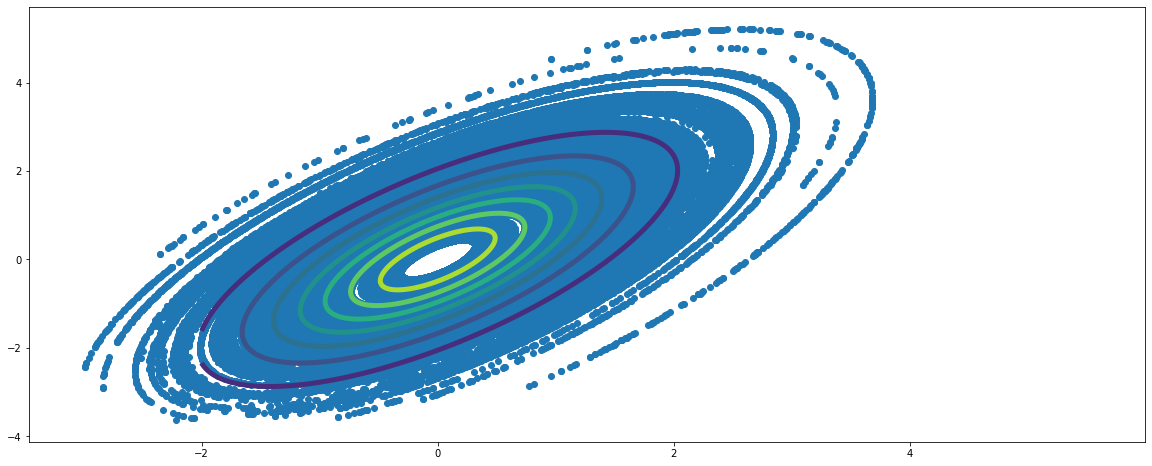

In [25]:
quick_MVN_scatter(persistent_samples, target)

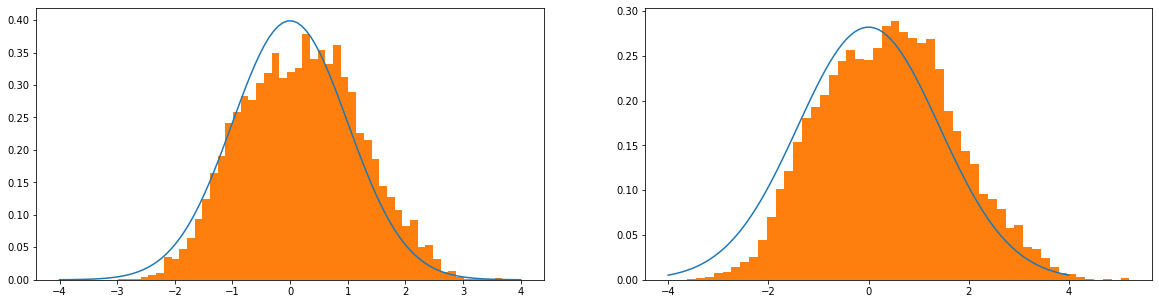

In [26]:
quick_MVN_marginals(persistent_samples, target)

In [21]:
samples = MixtureManifoldHMC(x0, alpha=alpha, N=N, n=n, m=m, Sigma=Sigma, mu=mu, T=T, epsilon=epsilon, M=M)

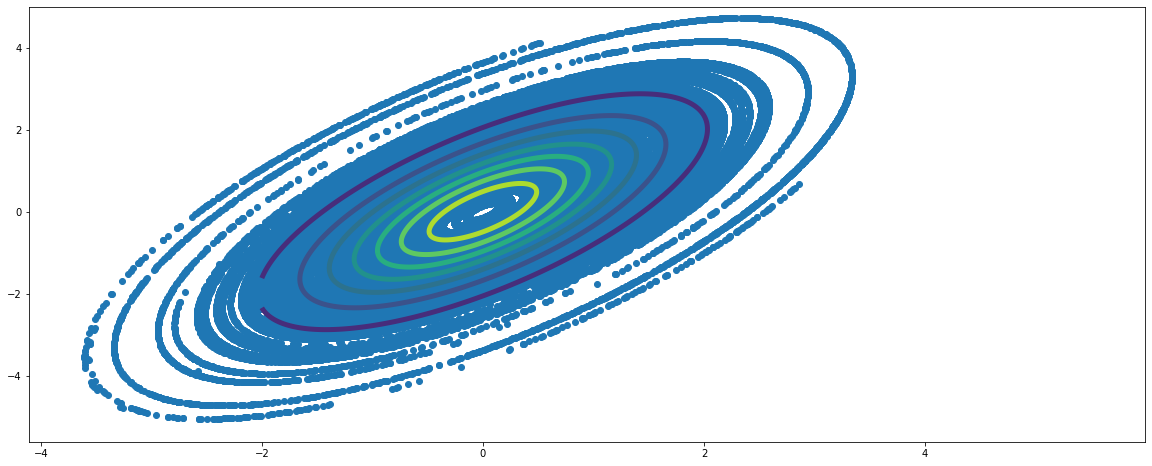

In [22]:
quick_MVN_scatter(samples, target)

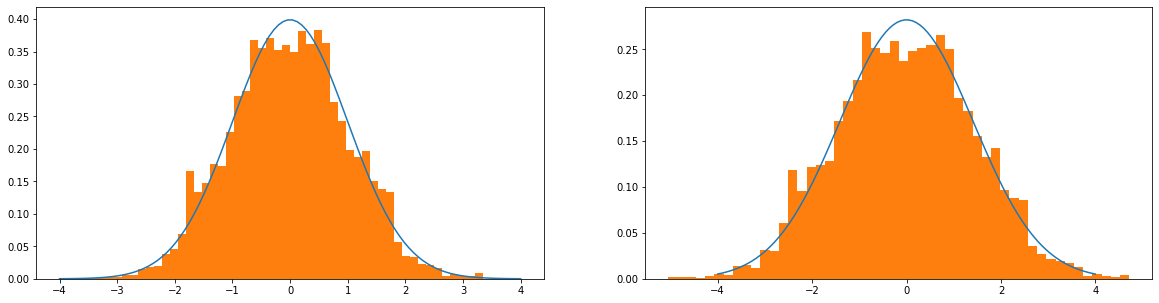

In [23]:
quick_MVN_marginals(samples, target)